In [7]:
import numpy as np
import dlib
import cv2

In [ ]:
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
MOUTH = list(range(48, 68))
NOSE = list(range(27, 36))
EYEBROWS = list(range(17, 27))
JAWLINE = list(range(1, 17))
ALL = list(range(0, 68))
EYES = list(range(36, 48))

predictor_file = 'D:/opencv_dnn_202005/opencv_dnn_202005/model/shape_predictor_68_face_landmarks.dat'
image_file = "D:/opencv_dnn_202005/opencv_dnn_202005/image/marathon_03.jpg"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_file)

image = cv2.imread(image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)
# 얼굴을 몇개나 찾았는가?
print("Number of faces detected: {}".format(len(rects)))
# 얼굴 인식한 좌표
print(rects)

for (i, rect) in enumerate(rects):
    # 얼굴의 각 점들의 좌표
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    # ALL을 위 RIGHT_EYE, JAWLINE 등으로 바꾸면 특정 point만 저장함
    show_parts = points[ALL]
    
    for (i, point) in enumerate(show_parts):
        # 찾은 점들의 x,y좌표에 원 및 숫자를 이미지에 그려준다.
        x = point[0,0]
        y = point[0,1]
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        cv2.putText(image, "{}".format(i + 1), (x, y - 2),
		cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)

cv2.imshow("Face Landmark", image)
cv2.waitKey(0)   

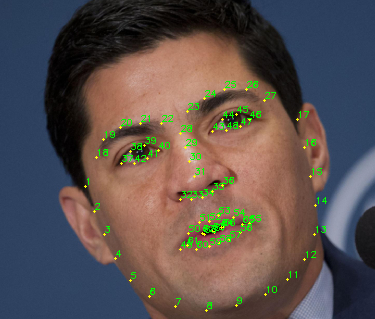